# Acquire your data

# Convert the date column to datetime

# Set the datetime column as the index

In [1]:
import pandas as pd
import numpy as np

from wrangle import acquire_store

In [2]:
df = acquire_store()

df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [3]:
df.shape

(913000, 7)

In [6]:
df.dtypes

sale_date         object
sale_amount        int64
item_brand        object
item_name         object
item_price       float64
store_address     object
store_zipcode      int64
dtype: object

In [7]:
df['sale_date'] = pd.to_datetime(df['sale_date'], infer_datetime_format=True)

df.dtypes

sale_date        datetime64[ns]
sale_amount               int64
item_brand               object
item_name                object
item_price              float64
store_address            object
store_zipcode             int64
dtype: object

In [9]:
df = df.set_index('sale_date')

df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [11]:
df = df.sort_index()

df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221


In [12]:
cols_inv = ['item_brand', 'item_name', 'store_address']

for col in cols_inv:
    
    uniq = df[col].nunique()
    
    print(f'There are {uniq} unique values in the {col} column.')

There are 49 unique values in the item_brand column.
There are 50 unique values in the item_name column.
There are 10 unique values in the store_address column.


In [13]:
df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [14]:
df.index.max() - df.index.min()

Timedelta('1825 days 00:00:00')

In [15]:
df.index.nunique()

1826

In [23]:
df.groupby(['item_brand', 'item_name']).count().sort_values(by='item_brand', ascending=False)

sale_amount  \
item_brand             item_name                                                         
Zhenas Gypsy Tea       Zhenas Gypsy Tea Herbal Red Tea Sachets Fire Li...        18260   
Van De Kamps           Van De Kamps Fillets Beer Battered - 10 Ct                18260   
Usda Produce           Plums Black                                               18260   
                       Guava                                                     18260   
Twinings Of London     Twinings Of London Classics Lady Grey Tea - 20 Ct         18260   
Triaminic              Triaminic Syrup Night Time Cold & Cough Grape 4oz         18260   
The First Years        Tomy The First Years Gumdrop Orthodontic Pacifi...        18260   
Sundown Naturals       Sundown Naturals Essential Electrolytes Tropica...        18260   
Suave                  Suave Naturals Moisturizing Body Wash Creamy Tr...        18260   
Smart Living           Smart Living Charcoal Lighter Fluid                       18260   
Scotch                 Scotch Removable Clear Mounting Squares - 35 Ct           18260   
Sally Hansen           Sally Hansen Nail Color Magnetic 903 Silver Ele...        18260   
Riceland               Riceland American Jazmine Rice                            18260   
Reese                  Reese Mandarin Oranges Segments In Light Syrup            18260   
Petmate                Petmate Booda Bones Steak Bacon & Chicken Flavo...        18260   
Pamprin                Pamprin Maximum Strength Multi-symptom Menstrua...        18260   
P.f. Changs            P.f. Changs Home Menu Meal For Two Beef With Br...        18260   
Natures Way            Natures Way Forskohlii - 60 Ct                            18260   
Nakano                 Nakano Seasoned Rice Vinegar Original                     18260   
Munchies               Munchies Sandwich Crackers Cheddar Cheese On Go...        18260   
Mueller                Mueller Sport Care Basic Support Level Medium E...        18260   
Morton                 Morton Kosher Salt Coarse                                 18260   
Moms Best Naturals     Moms Best Naturals Cereal Toasted Cinnamon Squares        18260   
Mama Marys             Pizza Sauce                                               18260   
Lea & Perrins          Lea & Perrins Marinade In-a-bag Cracked Peppercorn        18260   
Kelloggs               Kelloggs Disney Pixar Cars 2 Cereal                       18260   
Hood                   Hood Latte Iced Coffee Drink Vanilla Latte                18260   
Honest Tea             Honest Tea Peach White Tea                                18260   
Heinz                  Heinz Tomato Ketchup - 2 Ct                               18260   
Halls                  Halls Menthol Cough Suppresant/oral Anesthetic ...        18260   
Garnier Nutritioniste  Garnier Nutritioniste Moisture Rescue Fresh Cle...        18260   
Ferrara                Ferrara Vanilla Syrup                                     18260   
Elmers                 Elmers Board Mate Dual Tip Glue Pen                       18260   
Easy-off               Easy-off Oven Cleaner Lemon Scent                         18260   
Earths Best            Earths Best Organic Fruit Yogurt Smoothie Mixed...        18260   
Ducal                  Ducal Refried Red Beans                                   18260   
Dove                   Dove Men + Care Antiperspirant Deodorant Cool S...        18260   
Doctors Best           Doctors Best Best Curcumin C3 Complex 1000mg Ta...        18260   
Deerfields Gluten Free Rice Bran Gluten Free Dinner Rolls Plain                  18260   
Choice                 Choice Organic Teas Black Tea Classic Black - 1...        18260   
Caress                 Caress Velvet Bliss Ultra Silkening Beauty Bar ...        18260   
Careone                Careone Family Comb Set - 8 Ct                            18260   
Burts Bees             Burts Bees Daily Moisturizing Cream Sensitive             18260   
Boars Head             Bo

In [25]:
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221


In [26]:
df[df['item_brand'] == 'Usda Produce']

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,44,Usda Produce,Guava,7.52,1015 S WW White Rd,78220
2013-01-01,24,Usda Produce,Guava,7.52,12018 Perrin Beitel Rd,78217
2013-01-01,61,Usda Produce,Guava,7.52,15000 San Pedro Ave,78232
2013-01-01,50,Usda Produce,Guava,7.52,735 SW Military Dr,78221
2013-01-01,54,Usda Produce,Guava,7.52,8503 NW Military Hwy,78231
...,...,...,...,...,...,...
2017-12-31,78,Usda Produce,Guava,7.52,1520 Austin Hwy,78218
2017-12-31,62,Usda Produce,Guava,7.52,1015 S WW White Rd,78220
2017-12-31,59,Usda Produce,Guava,7.52,12018 Perrin Beitel Rd,78217


<AxesSubplot:xlabel='sale_date'>

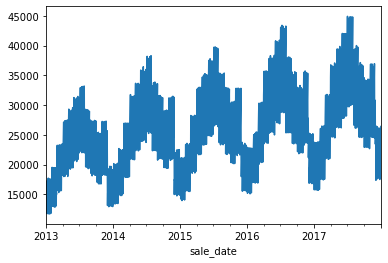

In [28]:
df.groupby('sale_date')['sale_amount'].sum().plot()

<AxesSubplot:xlabel='sale_date'>

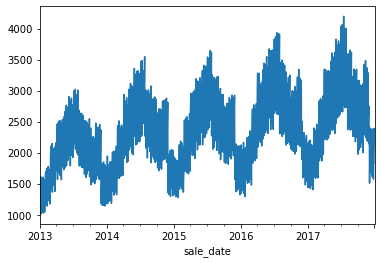

In [30]:
df[df['store_zipcode'] == 78253].groupby('sale_date')['sale_amount'].sum().plot()

<AxesSubplot:xlabel='sale_date'>

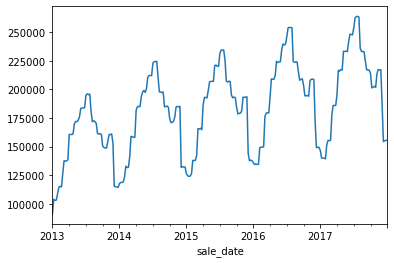

In [38]:
df.resample('W')['sale_amount'].sum().plot()

<AxesSubplot:xlabel='sale_date'>

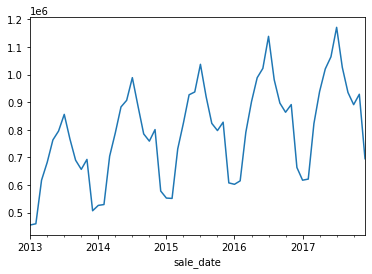

In [36]:
df.resample('M')['sale_amount'].sum().plot()